In [10]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [11]:
Advertise_data = pd.read_csv('C:/Users/Ruchika jain/OneDrive/Desktop/KAGGLE PROJECTS/Advertisement Click data set/Ad click data.csv',encoding='latin')
Advertise_data.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [12]:
Advertise_data.shape

(6657, 14)

In [13]:
 Advertise_data= Advertise_data.drop_duplicates()
Advertise_data.shape

(6657, 14)

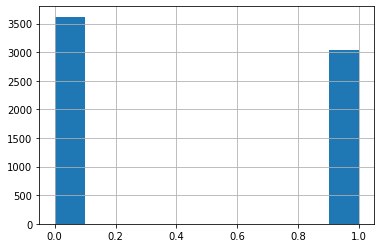

In [14]:
Advertise_data['Clicked'].hist()

In [15]:
Advertise_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 780.1+ KB


In [16]:
Advertise_data.describe()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Year,Clicked
count,6.657000e+03,6657.000000,6657.000000,6657.000000,6657.000000,6657.0,6657.000000
mean,5.542115e+06,66.849548,37.258825,55930.486743,184.947684,2020.0,0.456362
std,2.596284e+06,15.509672,10.995458,13110.339257,43.189896,0.0,0.498129
min,1.000187e+06,32.600000,19.000000,13996.500000,104.780000,2020.0,0.000000
25%,3.307428e+06,55.200000,28.000000,48454.000000,145.730000,2020.0,0.000000
50%,5.523907e+06,70.660000,36.000000,58183.000000,193.580000,2020.0,0.000000
75%,7.823942e+06,79.570000,46.000000,65957.000000,222.260000,2020.0,1.000000
max,9.999708e+06,91.430000,61.000000,79484.800000,269.960000,2020.0,1.000000


In [17]:
Advertise_data.nunique()

VistID            6657
Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
Country_Name       237
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Year                 1
Clicked              2
dtype: int64


VistID             Conti -reject
Time_Spent         Conti - select
Age                conti- select
Avg_Income         conti- select
Internet_Usage     conti - select
Ad_Topic           conti - select
Country_Name       conti - reject
City_code            catego - select
Male                 catego - select
Time_Period          catego - select
Weekday              catego - select
Month                catego - select
Year                 catego - reject
Clicked              catego - select



In [18]:
Advertise_data= Advertise_data.drop(['VistID','Country_Name','Year'], axis= 1)
Advertise_data.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night,Thursday,July,0
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening,Saturday,June,1
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning,Tuesday,January,0
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning,Thursday,April,1
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon,Thursday,January,0


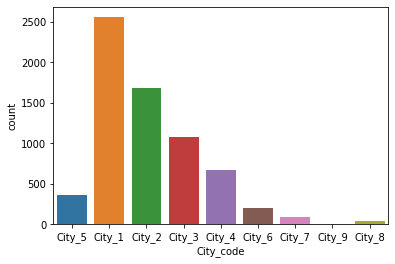

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x= 'City_code',data= Advertise_data)
plt.show()

In [20]:
def plotbarchart(inpData, Colstoplot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    
    fig, subplot = plt.subplots(nrows = 1, ncols= len(Colstoplot), figsize = (20,5))
    # OR fig, subplot = plt.subplots(nrows= len(Colstoplot),ncols=1, figsize = (5,15))
    fig.suptitle("bar chart of: " + str(Colstoplot))
    
    for colnum, plotnum in zip (Colstoplot, range(len(Colstoplot))):
        inpData.groupby(colnum).size().plot(kind='bar',ax= subplot[plotnum])
        

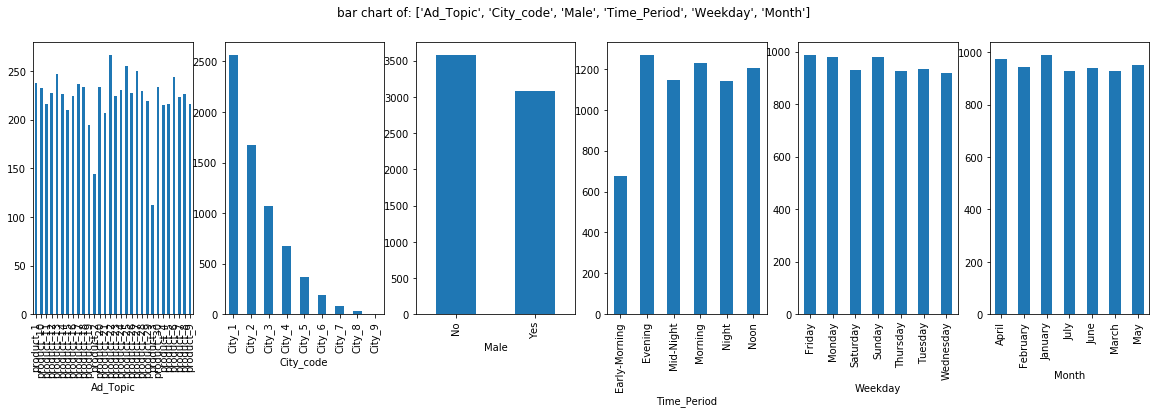

In [21]:
 plotbarchart(inpData=Advertise_data , Colstoplot= ["Ad_Topic","City_code", "Male",
                                               "Time_Period", "Weekday","Month"])

In this data, all the categorical columns have satisfactory distribution for machine learning.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA7D350688>,
      dtype=object)

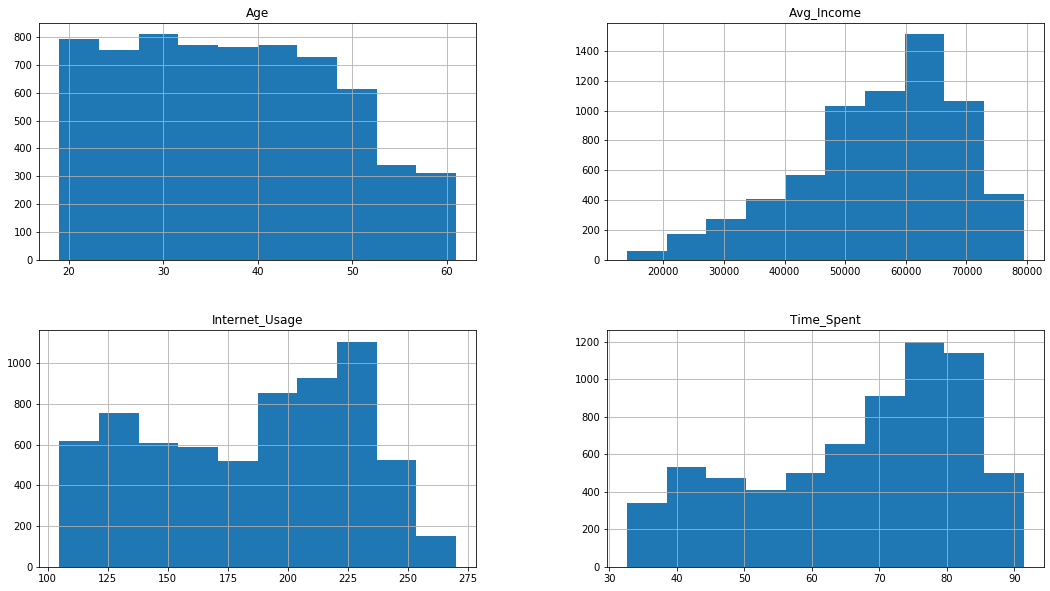

In [22]:
Advertise_data.hist(['Time_Spent','Age','Avg_Income','Internet_Usage','Ad_Topic'],figsize=(18,10))

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

In [23]:
Advertise_data.isnull().sum()

Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Clicked           0
dtype: int64

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data


Visual exploration of relationship between variables

Continuous Vs Continuous ---- Scatter Plot

Categorical Vs Continuous---- Box Plot

Categorical Vs Categorical---- Grouped Bar Plots

Statistical measurement of relationship strength between variables

Continuous Vs Continuous ---- Correlation matrix

Categorical Vs Continuous---- ANOVA test

Categorical Vs Categorical--- Chi-Square test

Relationship exploration: Categorical Vs Continuous -- Box Plots

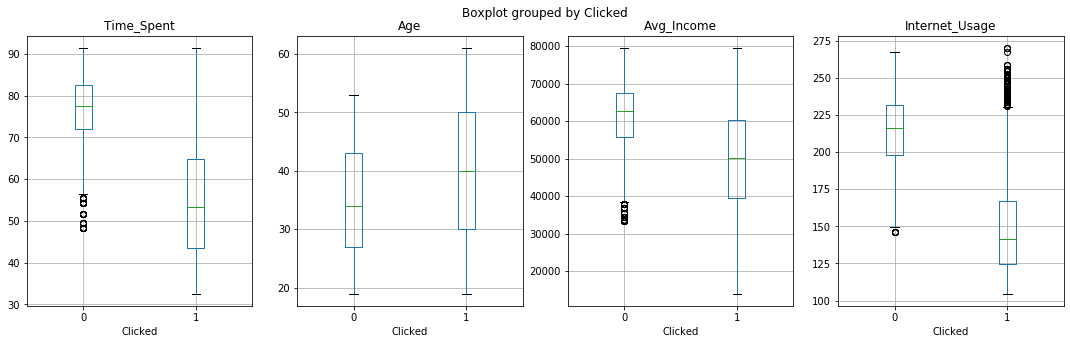

In [24]:
ContinuousColList= ['Time_Spent','Age','Avg_Income','Internet_Usage']

import matplotlib.pyplot as plt

fig, subplot = plt.subplots(nrows= 1, ncols= len (ContinuousColList), figsize= (18,5))

for i, plotnum in zip(ContinuousColList, range(len(ContinuousColList))):
    Advertise_data.boxplot(column = i, by= 'Clicked', figsize= (18,5), vert= True, ax=subplot[plotnum])
    



If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other. But here distribution are not similar

Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [35]:
def AnnovaResult(inpData, TargetVariable, ContinuousVariable):
    from scipy.stats import f_oneway
    
    
    selectedPred =[]
    
    for i in ContinuousVariable:
        categolist = inpData.groupby(TargetVariable)[i].apply(list)
        AnnovaResults= f_oneway(*categolist)
        
        
        if (AnnovaResults[1]<0.05):
            print(i, 'correlated with the target variable p value:',AnnovaResults[1])
            selectedPred.append(i)
        else:
            print(i, 'not correlated with target variable p-value', AnnovaResults[1])
            
    return(selectedPred)
            
            
        
        

In [36]:
AnnovaResult(inpData=Advertise_data , TargetVariable='Clicked', ContinuousVariable= 
                                                                 ['Time_Spent','Age','Avg_Income','Internet_Usage'])


Time_Spent correlated with the target variable p value: 0.0
Age correlated with the target variable p value: 6.40789044460054e-91
Avg_Income correlated with the target variable p value: 0.0
Internet_Usage correlated with the target variable p value: 0.0


['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage']

Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

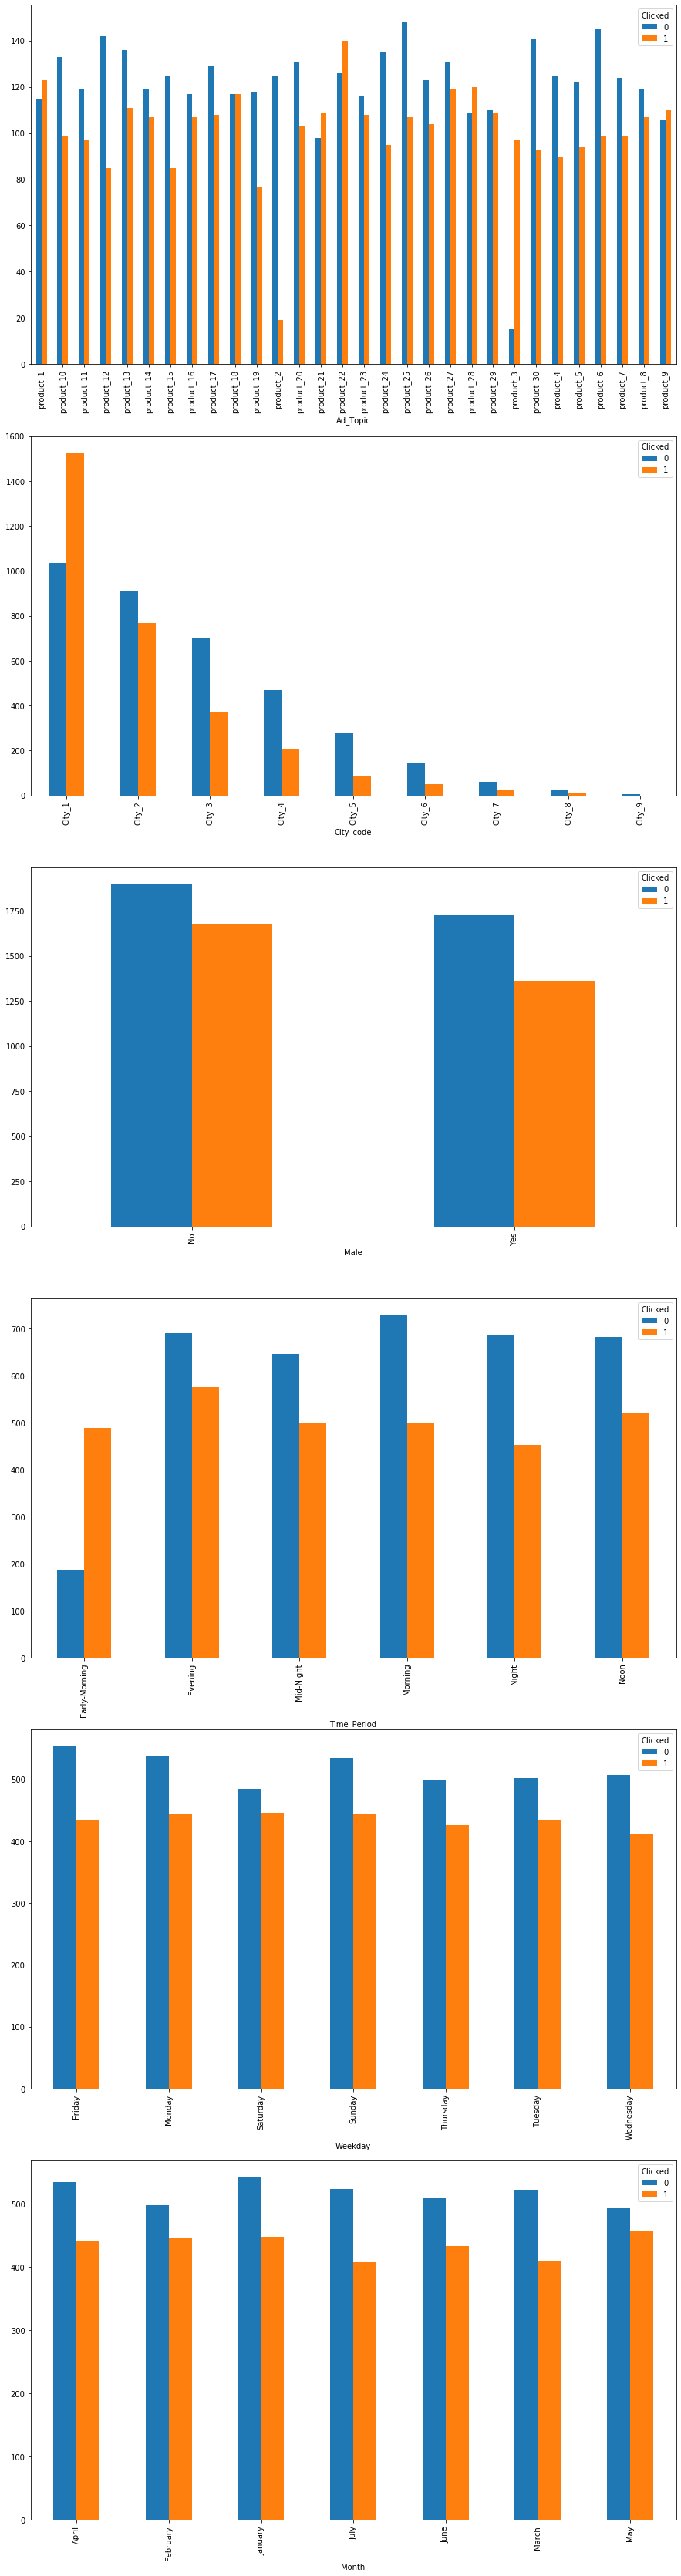

In [27]:
CategoricalList= ["Ad_Topic","City_code", "Male", "Time_Period", "Weekday","Month"]

import matplotlib.pyplot as plt

fig, subplot= plt.subplots(nrows= len(CategoricalList),figsize= (15,60))


for colnum, plotnum in zip( CategoricalList, range(len(CategoricalList))):
    crosstabResult= pd.crosstab(index= Advertise_data[colnum], columns= Advertise_data['Clicked'])
    crosstabResult.plot.bar(ax= subplot[plotnum])


These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated.

Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

In [33]:
def chisquare(inpData,TargetVariable, CategoriacalList):
    from scipy.stats import chi2_contingency
    
    
    selectedPred=[]
    
    for i in CategoricalList:
        categolist = pd.crosstab(index= inpData[TargetVariable], columns=inpData[i])
        chisqresult= chi2_contingency(categolist)
        
        
        if(chisqresult[1] <0.05):
            print( i,'it is correlated p value', chisqresult[1])
            selectedPred.append(i)
        else:
            print(i, 'it is not  correlated p value', chisqresult[1])
            
    return(selectedPred)
                  

In [34]:
chisquare(inpData= Advertise_data,TargetVariable='Clicked', CategoriacalList=
                                                        ["Ad_Topic","City_code", "Male", "Time_Period", "Weekday","Month"])

Ad_Topic it is correlated p value 1.2676573604736464e-24
City_code it is correlated p value 2.6667953391697526e-88
Male it is correlated p value 0.02695171301745074
Time_Period it is correlated p value 4.465745015735695e-47
Weekday it is not  correlated p value 0.7226317326250824
Month it is not  correlated p value 0.4229049097263303


['Ad_Topic', 'City_code', 'Male', 'Time_Period']

In [38]:
selectedPredictor= ['Time_Spent','Age','Avg_Income','Internet_Usage','Ad_Topic','City_code', 'Male', 'Time_Period']
FinalData = Advertise_data[selectedPredictor]
FinalData.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon


In [40]:
FinalData['Male'].replace({'Yes':1,'No':0},inplace= True)
FinalData.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,0,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,0,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,0,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,1,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,0,Noon


In [41]:
Final_numData= pd.get_dummies(FinalData)
Final_numData['Clicked']= Advertise_data['Clicked']
Final_numData.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Male,Ad_Topic_product_1,Ad_Topic_product_10,Ad_Topic_product_11,Ad_Topic_product_12,Ad_Topic_product_13,...,City_code_City_7,City_code_City_8,City_code_City_9,Time_Period_Early-Morning,Time_Period_Evening,Time_Period_Mid-Night,Time_Period_Morning,Time_Period_Night,Time_Period_Noon,Clicked
0,87.97,43,55901.12,185.46,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,51.63,50,39132.00,176.73,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,82.37,38,57032.36,210.60,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,62.06,45,48868.00,190.05,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,77.66,31,61608.23,204.86,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
Final_numData.columns

Index(['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 

In [46]:
TargetVariable = 'Clicked'
Predictors = ['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 'City_code_City_9',
       'Time_Period_Early-Morning', 'Time_Period_Evening',
       'Time_Period_Mid-Night', 'Time_Period_Morning', 'Time_Period_Night',
       'Time_Period_Noon']

X= Final_numData[Predictors].values
y= Final_numData[TargetVariable].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y , test_size= 0.3, random_state=42 )

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4659, 50)
(1998, 50)
(4659,)
(1998,)


# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

F1_score = metrics.f1_score(y_test,y_pred, average='weighted')
print(F1_score)

print(metrics.classification_report(y_test, y_pred))


[[940 140]
 [302 616]]
0.7757915454839686
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1080
           1       0.81      0.67      0.74       918

    accuracy                           0.78      1998
   macro avg       0.79      0.77      0.77      1998
weighted avg       0.78      0.78      0.78      1998



# Desicion Tree

In [68]:

from sklearn import tree
model= tree.DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

F1_score = metrics.f1_score(y_test,y_pred, average='weighted')
print(F1_score)

print(metrics.classification_report(y_test, y_pred))

[[986  94]
 [ 96 822]]
0.9048970384883556
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1080
           1       0.90      0.90      0.90       918

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998



# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

modell= RandomForestClassifier()

modell.fit(X_train, y_train)
y_pred = modell.predict(X_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

F1_score = metrics.f1_score(y_test,y_pred, average='weighted')
print(F1_score)

print(metrics.classification_report(y_test, y_pred))

[[1053   27]
 [  88  830]]
0.9422438374604319
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1080
           1       0.97      0.90      0.94       918

    accuracy                           0.94      1998
   macro avg       0.95      0.94      0.94      1998
weighted avg       0.94      0.94      0.94      1998



## SVM

In [86]:
# Support Vector Machines(SVM)
from sklearn import svm
modells= svm.SVC()

modells.fit(X_train, y_train)
y_pred = modells.predict(X_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

F1_score = metrics.f1_score(y_test,y_pred, average='weighted')
print(F1_score)

print(metrics.classification_report(y_test, y_pred))



[[980 100]
 [460 458]]
0.7055592177543397
              precision    recall  f1-score   support

           0       0.68      0.91      0.78      1080
           1       0.82      0.50      0.62       918

    accuracy                           0.72      1998
   macro avg       0.75      0.70      0.70      1998
weighted avg       0.74      0.72      0.71      1998



[[1054   26]
 [  93  825]]
0.9402084801132868
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1080
           1       0.97      0.90      0.93       918

    accuracy                           0.94      1998
   macro avg       0.94      0.94      0.94      1998
weighted avg       0.94      0.94      0.94      1998


Accuracy values for 10-fold Cross Validation:
 [0.94731613 0.91046301 0.93808219 0.94570242 0.93509584 0.96228409
 0.94719772 0.95176713 0.95320376 0.95478465]

Final Average Accuracy of the model: 0.94


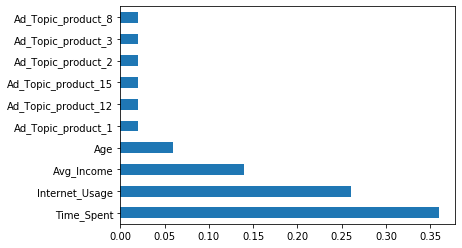

In [93]:
from sklearn.ensemble import AdaBoostClassifier
modell= AdaBoostClassifier()

AB= modell.fit(X_train, y_train)
y_pred = modell.predict(X_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

F1_score = metrics.f1_score(y_test,y_pred, average='weighted')
print(F1_score)

print(metrics.classification_report(y_test, y_pred))


from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



%matplotlib inline
imp_feature = pd.Series(AB.feature_importances_, index = Predictors)
imp_feature.nlargest(10).plot(kind='barh')

WE CAN SEE THAT RANDOM FOREST GIVE THE BEST RESULT. And TIME_SPENT, INTERNET_USAGE, AVG_INCOME AND AGE ARE THE MAJOR FACTOR IN PREDICTING IF A PERSON WILL CLICK ON THE THE ADD OR NOT